In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV

from pipelines import benchmark_pipelines, build_regression_pipelines, pipeline_Freeman
from views import view_linear_model_freeman

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1) Combine data

In [2]:
from source import read_preprocessed_data
from transform import combine_tsv_files

From the classification analysis, we know that allele frequency + harmonic mean is on average the best combo.

In [3]:
# Harmonic mean genomic variable.
X_train_hm, y_train_hm = combine_tsv_files(
    "output/train__harmonic_mean__Allele Fraction.tsv",
    "output/train__harmonic_mean__CNV Score.tsv",
)

# 2) Select best model

In [4]:
# Construct a variety of pipelines.
pipelines = build_regression_pipelines()

In [5]:
rmse = make_scorer(mean_squared_error)

In [6]:
# And benchmark them using the root mean squared error.
benchmark_os = benchmark_pipelines(
    pipelines, X_train_hm, y_train_hm["OS_days"], metric=rmse
)
benchmark_pfs = benchmark_pipelines(
    pipelines, X_train_hm, y_train_hm["PFS_days"], metric=rmse
)

In [7]:
benchmark_os.round(2)

,Richard mean,Richard std,Julian mean,Julian std,Freeman mean,Freeman std
DecisionTreeRegressor,1.320228e+05,2.302644e+04,154298.94,50322.90,1.691847e+05,4.755635e+04
RandomForestRegressor,1.162628e+05,3.431714e+04,127968.27,40270.53,1.211082e+05,4.481623e+04
GradientBoostingRegressor,1.107707e+05,3.078802e+04,113648.80,42553.16,1.173826e+05,4.309737e+04
KNeighborsRegressor,1.327421e+05,4.142227e+04,140693.79,45424.86,1.070413e+05,2.814888e+04
ElasticNet,1.104523e+05,4.179849e+04,113963.52,40925.61,1.077549e+05,3.860127e+04
LinearRegression,1.946271e+29,3.892543e+29,133647.03,31366.15,1.320952e+11,2.628707e+11
ARDRegression,1.186108e+05,3.976532e+04,117466.35,36651.11,1.161899e+05,2.965710e+04
BayesianRidge,1.093989e+05,4.140712e+04,113817.89,42376.67,1.074532e+05,3.879115e+04
SVR,1.337689e+05,5.719282e+04,133152.04,56916.46,1.328589e+05,5.619221e+04
DummyRegressor,1.339311e+05,5.723966e+04,133931.10,57239.66,1.339311e+05,5.723966e+04


In [8]:
benchmark_pfs.round(2)

,Richard mean,Richard std,Julian mean,Julian std,Freeman mean,Freeman std
DecisionTreeRegressor,1.193474e+05,5.322945e+04,113457.93,71668.67,1.461383e+05,5.513201e+04
RandomForestRegressor,1.153449e+05,3.429492e+04,105246.75,51535.97,1.077305e+05,5.792505e+04
GradientBoostingRegressor,9.811475e+04,4.400663e+04,96954.98,55715.18,1.022464e+05,5.373566e+04
KNeighborsRegressor,1.135863e+05,4.712837e+04,105501.74,50811.44,9.562938e+04,3.973797e+04
ElasticNet,9.887301e+04,5.115137e+04,98688.99,51951.77,9.712700e+04,4.763628e+04
LinearRegression,3.425941e+28,6.851882e+28,109594.79,41605.94,1.001575e+11,1.998816e+11
ARDRegression,1.102684e+05,4.922511e+04,101590.88,49088.34,1.072783e+05,3.992876e+04
BayesianRidge,1.001325e+05,5.105851e+04,98938.28,53156.83,9.883815e+04,5.058607e+04
SVR,1.248555e+05,7.269185e+04,124434.13,73452.05,1.243499e+05,7.285767e+04
DummyRegressor,1.255101e+05,7.289706e+04,125510.05,72897.06,1.255101e+05,7.289706e+04


In [11]:
def compare_richard_freeman_regression(b):
    # Remove linear regression because it has huge error.
    models = list(b.index)
    models.remove('LinearRegression')
    b = b.loc[models]

    max_y = max(max(b['Richard mean'] + b['Richard std']), max(b['Freeman mean'] + b['Freeman std']))

    plt.rc('font', family='serif')
    fig = plt.figure(figsize=(6, 6))
    degrees=75
    plt.ylabel('mean squared error')
    plt.xticks(rotation=degrees)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ylim([0, max_y])
    
    max_mse = max(b["Freeman mean"] + b["Freeman std"])
    # Make shading in the figure.
    plt.gca().fill_between(
        [-1, 9],
        b["Freeman mean"]["DummyRegressor"],
        max_mse,
        facecolor="grey",
        edgecolor="k",
        alpha=0.25,
        hatch="\\",
    )
    plt.errorbar(b.index, b['Richard mean'], yerr=b['Richard std'], label='clinical')
    plt.errorbar(b.index, b['Freeman mean'], yerr=b['Freeman std'], label='clinical + genomic')
    plt.legend(frameon=False, loc=8)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


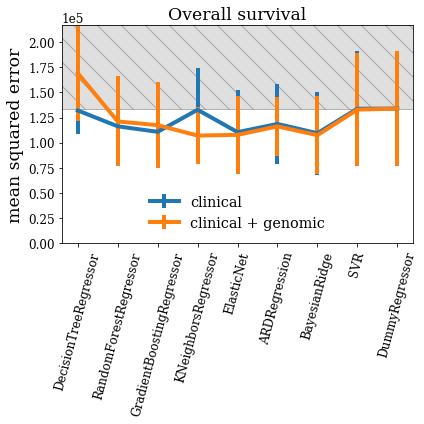

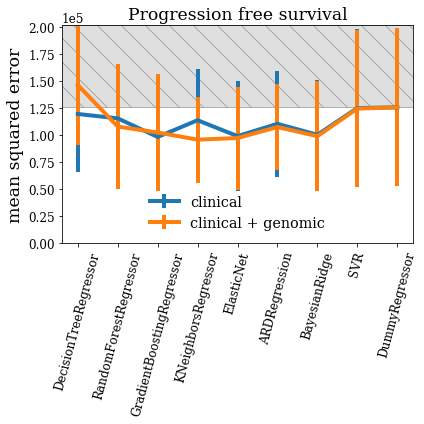

In [13]:

compare_richard_freeman_regression(benchmark_os)
plt.title('Overall survival')
plt.savefig('figs/comparison_os.png', bbox_inches = 'tight')
plt.savefig('figs/comparison_os.eps', bbox_inches = 'tight')

compare_richard_freeman_regression(benchmark_pfs)
plt.title('Progression free survival')
plt.savefig('figs/comparison_pfs.png', bbox_inches = 'tight')
plt.savefig('figs/comparison_pfs.eps', bbox_inches = 'tight')

# 3) Hyper parameter tuning

In [14]:
random_state = 1234
elasticnet_Freeman_parameters = {
    "random_state": random_state,
    "max_iter": 1000,
}

elasticnet_Freeman_hyper_parameters = {
    "transform_columns__age_discretizer__n_bins": (2, 3, 4, 5, 6),
    "filter_rare_mutations__top_k_features": (4, 5, 6, 7, 8, 10, 12, 24, 48),
    "estimator__l1_ratio": (0.025, 0.05, 0.12, 0.25, 0.38, 0.45, 0.5, 0.55, 0.63, 0.75, 0.87, 1.0),
    "estimator__alpha": (0.13, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 4.0, 6.0, 8.0, 10.0, 16.0, 32.0, 64.0),
}

In [15]:
elastic_Freeman = pipeline_Freeman(ElasticNet, **elasticnet_Freeman_parameters)
regr = GridSearchCV(
    elastic_Freeman,
    elasticnet_Freeman_hyper_parameters,
    scoring="neg_mean_squared_error",
    n_jobs=8,
    cv=5,
)

## Tuning for overall survival

In [16]:
# regr.fit(X_train_hm, y_train_hm["OS_days"])

In [17]:
# print("Best parameters set found on development set:")
# print()
# print(regr.best_params_)
# print()
# print("Grid scores on development set:")
# print()
# means = regr.cv_results_['mean_test_score']
# stds = regr.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, regr.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
# print()

# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
# print()
# print()


In [18]:
best_params_os = {
    "estimator__alpha": 0.5,
    "estimator__l1_ratio": 0.025,
    "filter_rare_mutations__top_k_features": 4,
#     "transform_columns__age_discretizer__n_bins": 2,
}

## Tuning for progression free survival

In [19]:
# regr.fit(X_train_hm, y_train_hm["PFS_days"])

In [20]:
# print("Best parameters set found on development set:")
# print()
# print(regr.best_params_)
# print()
# print("Grid scores on development set:")
# print()
# means = regr.cv_results_['mean_test_score']
# stds = regr.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, regr.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
# print()

# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
# print()
# print()


In [21]:
best_params_pfs = {
    "estimator__alpha": 0.75,
    "estimator__l1_ratio": 0.025,
    "filter_rare_mutations__top_k_features": 4,
#     "transform_columns__age_discretizer__n_bins": 2,
}

# 7) Plot coefficients.

In [22]:
# Don't plot coefficients with magnitude below this thresshold.
coefficient_cut_off = 1.0

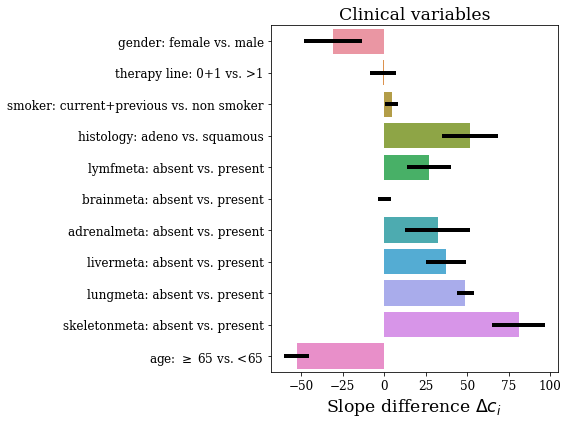

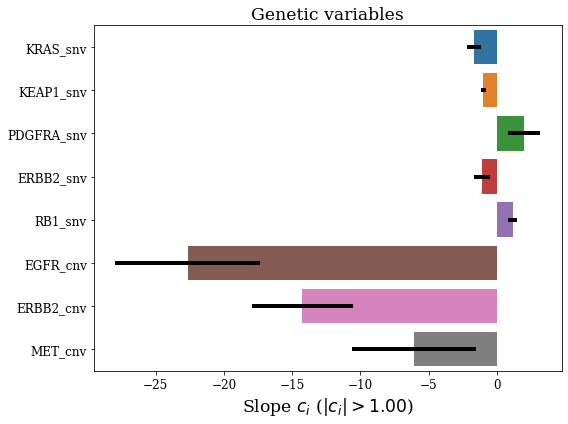

In [23]:
elastic_Freeman.set_params(**best_params_os)
figure_names_os = ('elastic_regression_clinical_os', 'elastic_regression_genetic_os')
view_linear_model_freeman(X_train_hm, y_train_hm["OS_days"], elastic_Freeman, filenames=figure_names_os, thresshold=coefficient_cut_off)

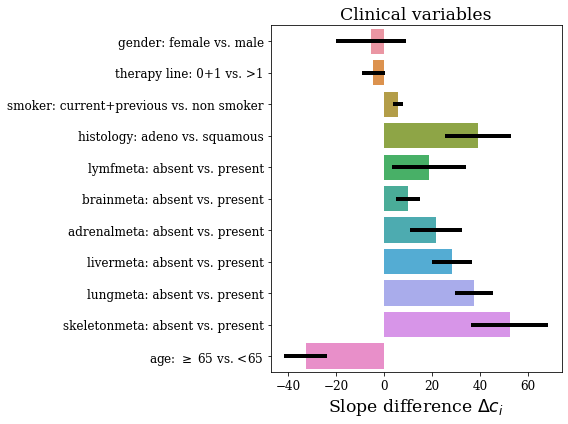

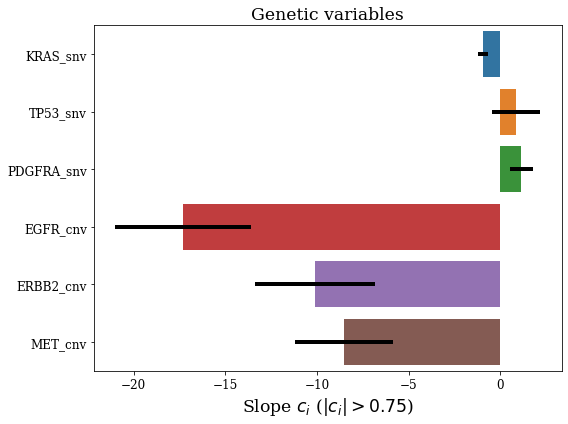

In [24]:
elastic_Freeman.set_params(**best_params_pfs)
figure_names_pfs = ('elastic_regression_clinical_pfs', 'elastic_regression_genetic_pfs')
view_linear_model_freeman(X_train_hm, y_train_hm["PFS_days"], elastic_Freeman, filenames=figure_names_pfs, thresshold=coefficient_cut_off*0.75)